In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax,Flatten
import os
import cv2


## importing Dataset

Datadir="D:\imp docs\sem3\project\Implementation\imp1\model cnn"
Categories = ["1","2","3","4","5","6","7","8","9","0","unknown"]

In [28]:
import pickle

In [29]:
pickle_in = open("X.pickle" , "rb")
X = pickle.load(pickle_in)



In [30]:
pickle_on = open("Y.pickle" ,"rb")
Y= pickle.load(pickle_on)

# splitting the dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_orig , X_test_orig ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.30)

In [33]:
Y_train = np.array(Y_train)

In [34]:
Y_test  = np.array(Y_test)

In [35]:
Y_train.shape

(10500,)

In [36]:
Y_test.shape

(4500,)

In [37]:
X_train_orig.shape

(10500, 70, 70, 1)

In [38]:
X_test_orig.shape

(4500, 70, 70, 1)

# setting number of total training and test size

In [39]:
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]
num_px = X_train_orig.shape[1]

In [40]:
print("number of trianing examples : m_train = {}".format(m_train))
print("numver of test examples : m_test = {}".format(m_test))
print("dimensions of each images is  : (num_px,num_px) = ({},{})".format(num_px,num_px))

number of trianing examples : m_train = 10500
numver of test examples : m_test = 4500
dimensions of each images is  : (num_px,num_px) = (70,70)


In [41]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [42]:
Y_train[0:50]

array([9, 8, 7, 2, 8, 1, 4, 0, 9, 5, 9, 4, 3, 5, 2, 9, 2, 2, 8, 3, 9, 5,
       3, 9, 4, 4, 0, 9, 5, 0, 5, 8, 4, 9, 9, 4, 8, 9, 0, 6, 7, 4, 3, 5,
       5, 8, 8, 7, 5, 8])

In [43]:
X_train[0,5]

array([[0.65882353],
       [0.65882353],
       [0.65882353],
       [0.65882353],
       [0.65882353],
       [0.65490196],
       [0.65490196],
       [0.65490196],
       [0.65490196],
       [0.65490196],
       [0.65490196],
       [0.65490196],
       [0.65098039],
       [0.65098039],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64313725],
       [0.63921569],
       [0.64313725],
       [0.64313725],
       [0.64313725],
       [0.64313725],
       [0.63921569],
       [0.63529412],
       [0.63529412],
       [0.63529412],
       [0.63529412],
       [0.63137255],
       [0.63137255],
       [0.63137255],
       [0.63137255],
       [0.63137255],
       [0.62745098],
       [0.62745098],
       [0.62352941],
       [0.62352941],
       [0.61960784],
       [0.61960784],
       [0.61960784],
       [0.61960784],
       [0.619

# building network


In [44]:
# def get_model(input_shape):
#     model=Sequential()
#     model.add(Flatten(input_shape = input_shape))
#     model.add(Dense(200,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer = "Zeros",activation ="sigmoid",input_shape = input_shape,name = "hidden_layer_1"))
#     model.add(Dense(200,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros", activation = "sigmoid",name = "hidden_layer_2"))
#     model.add(Dense(120,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="relu",name ="hidden_relu_layer_1"))
#     model.add(Dense(75,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation = "sigmoid",name = "hidden_layer_3"))
#     model.add(Dense(50,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="relu",name= "hidden_Relu_2"))
#     model.add(Dense(10,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="softmax",name = "output_layer"))
#     return model

In [45]:
def get_model(input_shape):
    model=Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(128,activation ="relu",name = "hidden_layer_1"))
    model.add(Dense(128, activation = "relu",name = "hidden_layer_2"))
    model.add(Dense(128,activation ="relu",name ="hidden_relu_layer_1"))
    model.add(Dense(64,activation = "relu",name = "hidden_layer_3"))
    model.add(Dense(64,activation ="relu",name= "hidden_Relu_2"))
    model.add(Dense(10,activation ="softmax",name = "output_layer"))
    return model

def get_model(input_shape):
    


In [46]:
model = get_model(X_train[0].shape)

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4900)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               627328    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               16512     
_________________________________________________________________
hidden_relu_layer_1 (Dense)  (None, 128)               16512     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                8256      
_________________________________________________________________
hidden_Relu_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)               

# compile model

In [48]:
def compile_model(model):
    model.compile(
    optimizer =tf.keras.optimizers.SGD(learning_rate= 0.001,momentum =0.0,nesterov =False),
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
        
    
    
    
    
    )

In [49]:
compile_model(model)

# fit the model to the training data

In [58]:
def train_model (model, scaled_train_img,train_labels):
    history = model.fit(scaled_train_img,train_labels,epochs= 500,verbose = 0)
    return history

In [59]:
history = train_model(model,X_train,Y_train)

# plotting curvers

In [60]:
frame =pd.DataFrame(history.history)






[Text(0.5, 0, 'epochs '), Text(0, 0.5, 'accuracy')]

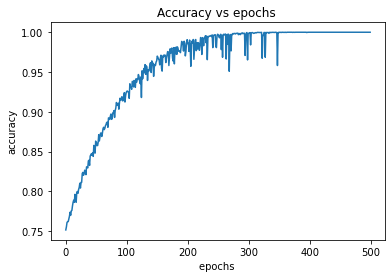

In [61]:
acc_plot = frame.plot(y="accuracy" ,title = "Accuracy vs epochs ", legend =False)
acc_plot.set(xlabel = "epochs " , ylabel ="accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

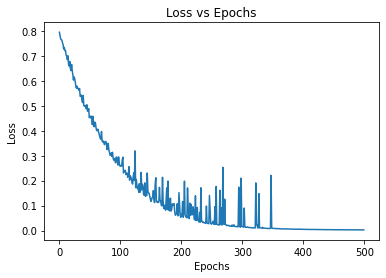

In [62]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# evaluate the model

In [63]:
def evaluate_model(model,scaled_test_img , test_labels):
    test_loss, test_accuracy  = model.evaluate (scaled_test_img ,test_labels)
    return test_loss,test_accuracy

In [64]:
test_loss,test_accuracy = evaluate_model(model,X_test ,Y_test)

141/141 [==============================] - 0s 2ms/step - loss: 1.0335 - accuracy: 0.8493


# model prediction

In [ ]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_inx, ...]
random_test_labels = Y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()